In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels),(test_images, test_labels)=keras.datasets.cifar10.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

170508288/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
categories=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'hourse', 'ship', 'truck']

In [14]:
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')

In [15]:
mean = np.mean(train_images, axis = (0,1,2,3))
std = np.std(train_images, axis = (0,1,2,3))

In [16]:
train_images= (train_images-mean)/(std + 1e-7)
test_images = (test_images-mean)/(std + 1e-7)

In [19]:
from keras.utils import np_utils
train_labels_cat = keras.utils.to_categorical(train_labels,10)
test_labels_cat = keras.utils.to_categorical(test_labels,10)

In [20]:
model = keras.Sequential([
                          keras.Input(shape=(32,32,3)),
                          keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(units=128, activation='relu'),
                          keras.layers.Dense(units=64, activation='relu'),
                          keras.layers.Dense(units=10, activation='softmax'),

])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        51264     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 1, 1, 128)       

In [21]:
model.compile(
    optimizer= keras.optimizers.RMSprop(learning_rate=0.0001),
    loss=keras.losses.kl_divergence,
    metrics=['accuracy']
)

In [22]:
train_images_norm=train_images.astype('float32')/255.0
test_images_norm=test_images.astype('float32')/255.0

In [23]:
h=model.fit(x=train_images, y=train_labels_cat,epochs=10, batch_size=32, validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 162s 148ms/step - loss: 1.8608 - accuracy: 0.3208 - val_loss: 1.6828 - val_accuracy: 0.3871
Epoch 2/10
1094/1094 [==============================] - 76s 70ms/step - loss: 1.5730 - accuracy: 0.4323 - val_loss: 1.5188 - val_accuracy: 0.4504
Epoch 3/10
1094/1094 [==============================] - 76s 70ms/step - loss: 1.4492 - accuracy: 0.4821 - val_loss: 1.4587 - val_accuracy: 0.4757
Epoch 4/10
1094/1094 [==============================] - 76s 70ms/step - loss: 1.3590 - accuracy: 0.5127 - val_loss: 1.3889 - val_accuracy: 0.5025
Epoch 5/10
1094/1094 [==============================] - 78s 71ms/step - loss: 1.2849 - accuracy: 0.5440 - val_loss: 1.3012 - val_accuracy: 0.5336
Epoch 6/10
1094/1094 [==============================] - 76s 69ms/step - loss: 1.2266 - accuracy: 0.5662 - val_loss: 1.3213 - val_accuracy: 0.5351
Epoch 7/10
1094/1094 [==============================] - 76s 69ms/step - loss: 1.1726 - accuracy: 0.5864 - val_loss: 1.2255

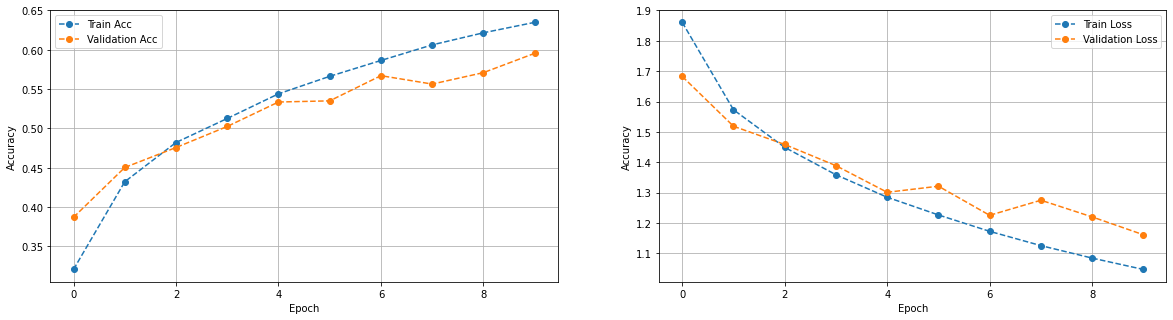

In [24]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'],'--o')
plt.plot(h.history['val_accuracy'],'--o')
plt.legend(['Train Acc','Validation Acc'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'],'--o')
plt.plot(h.history['val_loss'],'--o')
plt.legend(['Train Loss','Validation Loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()